        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

Enter price: 25511261


Area: 7420, Predicted price: 5817089.46 -> Cheap
Area: 8960, Predicted price: 6529838.60 -> Cheap
Area: 9960, Predicted price: 6992662.71 -> Cheap
Area: 7500, Predicted price: 5854115.39 -> Cheap
Area: 7420, Predicted price: 5817089.46 -> Cheap
Area: 7500, Predicted price: 5854115.39 -> Cheap
Area: 8580, Predicted price: 6353965.44 -> Cheap
Area: 16200, Predicted price: 9880685.17 -> Cheap
Area: 8100, Predicted price: 6131809.86 -> Cheap
Area: 5750, Predicted price: 5044173.20 -> Cheap
Area: 13200, Predicted price: 8492212.84 -> Cheap
Area: 6000, Predicted price: 5159879.22 -> Cheap
Area: 6550, Predicted price: 5414432.49 -> Cheap
Area: 3500, Predicted price: 4002818.94 -> Cheap
Area: 7800, Predicted price: 5992962.63 -> Cheap
Area: 6000, Predicted price: 5159879.22 -> Cheap
Area: 6600, Predicted price: 5437573.69 -> Cheap
Area: 8500, Predicted price: 6316939.51 -> Cheap
Area: 4600, Predicted price: 4511925.47 -> Cheap
Area: 6420, Predicted price: 5354265.35 -> Cheap
Area: 4320, Predic

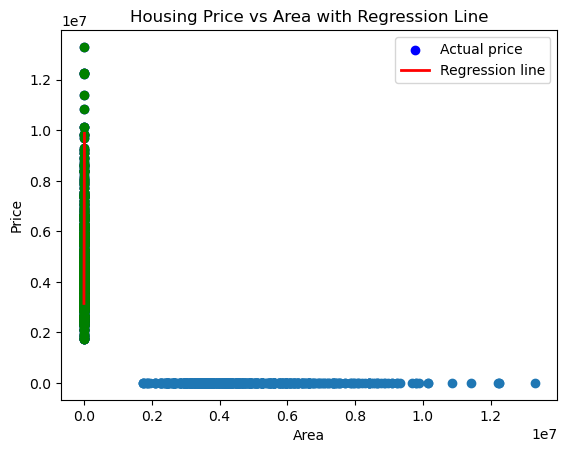

In [2]:
#Question-1: Predict the selling price of a house based on its square footage

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data =pd.read_csv(r"Housing.csv")# Data set import
print(data)
#Mean ber kora hoyehe price ar area then scatter plot show kora hoye che, mean ber kora hoye intercept ber koranor jonno
mean_price=np.mean(data["price"])
print(mean_price)
mean_area=np.mean(data["area"])
print(mean_area)
plt.scatter(data["price"], data["area"])

#Ekhane slope ar intercept ber kora hoye che using covariance and variance niye
cov=np.cov(data["area"],data["price"])
slope=cov[0,1]/np.var(data["area"])#[0,1] means first row and second is column in matrix->area and price covariance divided by varience of area
print(slope)
intercept= mean_price-slope*mean_area
print(intercept)

#User input
threshold=int(input("Enter price:"))

#Train model usin regression line = slope*x+intercept
def regression_line(x_val):
    return slope * x_val + intercept
x = data["area"]

#Value input in model
for i in range(len(x)):
    predicted = regression_line(x[i])
    if predicted > threshold:
        print(f"Area: {x[i]}, Predicted price: {predicted:.2f} -> Expensive")
    else:
        print(f"Area: {x[i]}, Predicted price: {predicted:.2f} -> Cheap")

#++++Visualization++++
plt.scatter(data["area"], data["price"], color='blue', label='Actual price')

# Feature range for regression line
x_range = np.linspace(min(data["area"]), max(data["area"]), 100)
y_pred_line = regression_line(x_range)

# Plot regression line
plt.plot(x_range, y_pred_line, color='red', linewidth=2, label='Regression line')

# Optional: color points based on threshold
for i in range(len(data["area"])):
    predicted = regression_line(data["area"][i])
    if predicted > threshold:
        plt.scatter(data["area"][i], data["price"][i], color='red')
    else:
        plt.scatter(data["area"][i], data["price"][i], color='green')

# Labels and legend
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Housing Price vs Area with Regression Line")
plt.legend()
plt.show()



0      False
1      False
2      False
3      False
4      False
       ...  
540    False
541    False
542    False
543    False
544    False
Name: bedrooms, Length: 545, dtype: bool 0      False
1      False
2      False
3      False
4      False
       ...  
540    False
541    False
542    False
543    False
544    False
Name: bathrooms, Length: 545, dtype: bool 0      False
1      False
2      False
3      False
4      False
       ...  
540    False
541    False
542    False
543    False
544    False
Name: price, Length: 545, dtype: bool
[[3.95319148e-07 3.67167728e-01]
 [3.67167728e-01 2.53891028e+06]]
[[2.69130994e-07 5.18496710e-01]
 [5.18496710e-01 3.72933579e+06]]
Correlation between bedrooms and price: 0.36649402577386797
Correlation between bathrooms and price: 0.5175453394550078

Intercept: 1137702.3548846473
Coefficients:
Bedrooms: 509598.9720675728
Bathrooms: 1646658.6558155054


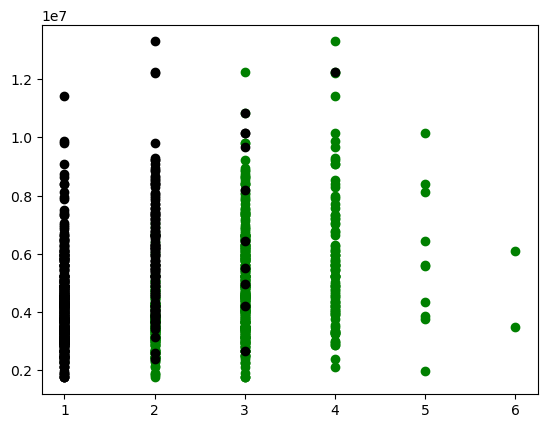

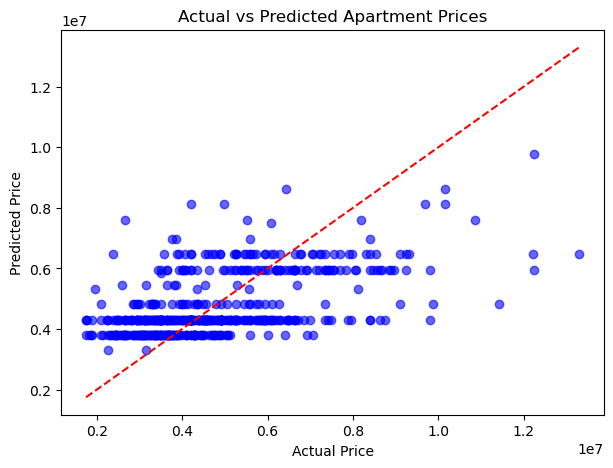

[5959816.58271838]


In [20]:
#Question 2: Estimate the price of an apartment based on the number of bedrooms and bathrooms.
from sklearn.linear_model import LinearRegression
bedrooms, bathrooms, price=data["bedrooms"], data["bathrooms"], data["price"]
print(bedrooms.isnull(), bathrooms.isnull(), price.isnull())

#feature=bedrooms, bathrooms
x1= bedrooms
x2=bathrooms
y=price

plt.scatter(bedrooms, price,color='g')
plt.scatter(bathrooms, price, color='k')

mean_bedrooms = np.mean(x1)
mean_bathrooms = np.mean(x2)
mean_price = np.mean(y)

#Standarad deviation and covarriance
std_x1=np.std(x1)
std_x2=np.std(x2)
std_y=np.std(y)

cov_x1_y=np.cov(x1,y)
cov_x2_y=np.cov(x2,y)
corr1=cov_x1_y/(std_x1*std_y)
print(corr1)

corr2=cov_x2_y/(std_x2*std_y)
print(corr2)

cov_x1_y = np.cov(x1, y, bias=True)[0,1]
cov_x2_y = np.cov(x2, y, bias=True)[0,1]

r_x1_y = cov_x1_y / (np.std(x1) * np.std(y))
r_x2_y = cov_x2_y / (np.std(x2) * np.std(y))


print("Correlation between bedrooms and price:", r_x1_y)
print("Correlation between bathrooms and price:", r_x2_y)

# Regression model
X = data[["bedrooms", "bathrooms"]]  # features
y = data["price"]  # target

model = LinearRegression()
model.fit(X, y)

print("\nIntercept:", model.intercept_)
print("Coefficients:")
print("Bedrooms:", model.coef_[0])
print("Bathrooms:", model.coef_[1])

# Predict prices
y_pred = model.predict(X)

# Compare actual vs predicted
plt.figure(figsize=(7,5))
plt.scatter(y, y_pred, color='blue', alpha=0.6)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Apartment Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

# Prediction
example = pd.DataFrame({"bedrooms": [3], "bathrooms": [2]})
predicted_price = model.predict(example)
print(predicted_price)

